# Modelling Diagnese 

## A. Summary & How to Use
This model is used to classify disease types based on 131 types of symptoms and then the user inputs what symptoms the user feels. Using this model, this model can predict about 41 types of diseases in the dataset.

## B. How to Make the Model?

### i. Data Pre-processing

1. Load datasets from **"Training.csv"** and **"Testing.csv"** using Pandas from **Dataset** folder.
2. Checking structur of data to gain an initial understanding of our **"Training.csv"** and **"Testing.csv"** dataset.
3. Examine the DataFrame for the data shape dimensions of the datasets **"Training.csv"** and **"Testing.csv"** using Pandas.
4. Checks empty cell of our **"Training.csv"** and **"Testing.csv"** datasets for make sure our dataset columns that do not have values using Pandas.
5. Check the prognosis column which will be the label/target y to find out how many types of data each disease has.

### ii. Data Preparation for Modelling

1. Separate the **feature** column (x) and the **target/label** column (y). Feature column is the **symptoms** starting from column 1-131, while Label is in the 132 column named **prognosis** on **"Training.csv"** and **"Testing.csv"** dataset.
2. Split dataset **"Training.csv"** for 2 usage, there is **80%** proportion of data used for **training** and **20%** proportion of data for **validation**.
3. **Label** y has a string data type, it needs to be converted to numeric with `LabelEncoder` using **Scikit-Learn**.

### iii. Modelling Process

1. Define the model, in this scope the model uses:
- 1 layer of keras Dense layer
- 1 layer of keras Dropout layer
- 1 layer of keras Dense layer

>The activation function in first Dense layer is `ReLu` because `ReLu` is one of the best activation function. No activation function for Dropout layer. For the last Dense Layer we have `softmax` activation function for multiclass clasification.

2. Compile the model. To fit this model the"Stochastic Gradient Descent" `SGD` better for optimizer. The loss function is `"sparse_categorical_crossentropy"` which is better for multi-class classification with `LabelEncoder` and `accuracy` as metric.
3. Fit the model with 20 `epoch`, 13 `batch_size` and `X_val` and `y_val` as validation data.

### iv. Evaluation

1. Evaluate the model to see performance model with `evaluate` method.
2. Plot the accuracy of the model in the epoch. The plot is the accuracy of both the train set and validation set data. After that, look at the graph. If the graph shows continue increase at each epoch, then the model is well-fit.
3. Plot the loss of the model in the epoch. The plot is the loss of both the train set and validation set data. After that, look at the graph. The graph should continue decrease at each epoch, then the model is well-fit.
4. Evaluate the model with classification report for get information:
- Precision 
- Recall 
- F1-Score
- Support
- accuracy average
- macro average
- micro average

### v. Save Model

Save the best model into `.hdf5` for re-training or just load to make some prediction with the model.

## C. Data Processing

The dataset we have is raw data, we need to preprocessing the data so that the data is ready to be used in the training process.

### i. Load Libraries

We use `import` to load libraries. The libraries we needed are:
- TensorFlow
- Pandas
- Numpy
- Matplotlib

In [3]:
pip install tensorflow

  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
     ---------------------------------------- 4.1/4.1 MB 88.1 kB/s eta 0:00:00
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached jax-0.4.11.tar.gz (1.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached protobuf-4.23.2-cp310-abi3-win_amd64.whl (422 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-an

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from keras.layers.core import Dropout

### ii. Load Dataset

Load datasets from **"Training.csv"** and **"Testing.csv"** using Pandas from **Dataset** folder. 
The **Training.csv"** dataset is the main dataset in preprocessing into modelling step. The result of raw data is shown below.

In [5]:
#read training data csv with header = 0 and delimiter = ;
df = pd.read_csv('Dataset/Training.csv', header=0, delimiter=',')
test_df = pd.read_csv('Dataset/Testing.csv', header=0, delimiter=';')

### iii. Check dimension of data

Use method `head` to get head of our data, Methode `shape` to get our dimension dataset and method `info` to get summary of dataset. The purpose is to gain an initial understanding of our Dataset.

In [7]:
#check 5 head data training
df.head(5)

,gatal,ruam_kulit,benjolan_pada_kulit,bersin-bersin,menggigil,merinding,nyeri_sendi,sakit_perut,asam_lambung,sariawan,...,komedo,menggaruk,pengelupasan_kulit,kulit_bersisik,celah_kecil_pada_kuku,peradangan_kuku,kulit_melepuh,luka_merah_di_sekitar_hidung,bekas_luka_berair,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal


In [8]:
#check 5 head data testing
test_df.head(5)

,gatal,ruam_kulit,benjolan_pada_kulit,bersin-bersin,menggigil,merinding,nyeri_sendi,sakit_perut,asam_lambung,sariawan,...,komedo,menggaruk,pengelupasan_kulit,kulit_bersisik,celah_kecil_pada_kuku,peradangan_kuku,kulit_melepuh,luka_merah_di_sekitar_hidung,bekas_luka_berair,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertigo Posisional Paroksismal
1,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Jerawat
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis Alkoholik
4,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alergi


In [6]:
#check dimension data training and testing
df.shape, test_df.shape

((4961, 132), (41, 132))

In [9]:
#get summary from training dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4961 entries, 0 to 4960
Columns: 132 entries, gatal to prognosis
dtypes: int64(131), object(1)
memory usage: 5.0+ MB


In [10]:
#get summary from testing dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Columns: 132 entries, gatal to prognosis
dtypes: int64(131), object(1)
memory usage: 42.4+ KB


### iv. Check empty cell

We can find empty cell with `isnull` method and calculate total of them with `sum` method.

In [30]:
# Check if there are cells that do not contain (NULL/NaN)
cek_training = df.isnull().sum()
cek_testing = test_df.isnull().sum()

print(f"Training: \n{cek_training}, \n\nTesting:\n{cek_testing}")

Training: 
gatal                           0
ruam_kulit                      0
benjolan_pada_kulit             0
bersin-bersin                   0
menggigil                       0
                               ..
peradangan_kuku                 0
kulit_melepuh                   0
luka_merah_di_sekitar_hidung    0
bekas_luka_berair               0
prognosis                       0
Length: 132, dtype: int64, 

Testing:
gatal                           0
ruam_kulit                      0
benjolan_pada_kulit             0
bersin-bersin                   0
menggigil                       0
                               ..
peradangan_kuku                 0
kulit_melepuh                   0
luka_merah_di_sekitar_hidung    0
bekas_luka_berair               0
prognosis                       0
Length: 132, dtype: int64


### v. See distribution of each Label

The label of data is **prognosis** column, we can calculate distrbution of each label with `value_counts` method.

In [31]:
#get distribution each label training data
df['prognosis'].value_counts()

Vertigo Posisional Paroksismal    121
Hepatitis C                       121
Hepatitis E                       121
Hipertensi                        121
Hipertiroidisme                   121
Hipoglikemia                      121
Hipotiroidisme                    121
Impetigo                          121
Kuning (penyakit kuning)          121
Malaria                           121
Migraine                          121
Osteoartritis                     121
Paralisis (pendarahan otak)       121
Penyakit ulkus peptikum           121
Pneumonia                         121
Psoriasis                         121
Tuberculosis                      121
Typus                             121
Infeksi saluran kemih             121
Hepatitis D                       121
Hepatitis B                       121
Jerawat                           121
Hepatitis A                       121
AIDS                              121
Hepatitis Alkoholik               121
Alergi                            121
Artritis    

In [33]:
#get distribution each label testing data
test_df['prognosis'].value_counts()

Vertigo Posisional Paroksismal    1
Hepatitis C                       1
Hepatitis E                       1
Hipertensi                        1
Hipertiroidisme                   1
Hipoglikemia                      1
Hipotiroidisme                    1
Impetigo                          1
Kuning (penyakit kuning)          1
Malaria                           1
Migraine                          1
Osteoartritis                     1
Paralisis (pendarahan otak)       1
Penyakit ulkus peptikum           1
Pneumonia                         1
Psoriasis                         1
Tuberculosis                      1
Typus                             1
Infeksi saluran kemih             1
Hepatitis D                       1
Hepatitis B                       1
Jerawat                           1
Hepatitis A                       1
AIDS                              1
Hepatitis Alkoholik               1
Alergi                            1
Artritis                          1
Asma Bronkial               

### vi. Separate Feature and Label

Separate feature and label from dataset using `drop` method. The target label of dataset is **prognosis** column.

In [34]:
features = [x for x in df.columns if x not in 'prognosis'] ## Removing our target variable
# Separate features and target variable in testing dataset
X_test = test_df.drop('prognosis', axis=1)  # Features
y_test = test_df['prognosis']  # Target variable

### vii. Split Training dataset into Train set and Validation set

Split dataset using `train_test_split` from **Scikit-Learn**.

Split **"Training.csv"** for 2 usage, there is **80%** proportion of data used for **training** and **20%** proportion of data for **validation**.

`random_state` to control the consistency of the split data.

In [35]:
RANDOM_STATE = 42  # Set the random seed for reproducibility
X_train, X_val, y_train, y_val = train_test_split(df[features], df['prognosis'], train_size = 0.8, random_state = RANDOM_STATE)

### viii. Label Encoder

Convert label y into numeric using `LabelEncoder` from **Scikit-Learn**.

Label y (prognosis) at **Training.csv** and **"Testing.csv** has a string datatype then needed convert to numeric before before entering the training step.

Then use `classes` method for show list of encoded.

In [36]:
# Make object LabelEncoder
label_encoder = LabelEncoder()

# Convert to numeric
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [37]:
# Show list of encoded
list(label_encoder.classes_)

['AIDS',
 'Alergi',
 'Artritis',
 'Asma Bronkial',
 'Cacar air',
 'Demam berdarah',
 'Diabetes',
 'GERD',
 'Gastroenteritis',
 'Hemoroid dimorfik (ambeien)',
 'Hepatitis A',
 'Hepatitis Alkoholik',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hipertensi',
 'Hipertiroidisme',
 'Hipoglikemia',
 'Hipotiroidisme',
 'Impetigo',
 'Infeksi jamur',
 'Infeksi saluran kemih',
 'Jerawat',
 'Kolestasis kronis',
 'Kuning (penyakit kuning)',
 'Malaria',
 'Migraine',
 'Osteoartritis',
 'Paralisis (pendarahan otak)',
 'Penyakit ulkus peptikum',
 'Pilek biasa',
 'Pneumonia',
 'Psoriasis',
 'Reaksi obat',
 'Serangan jantung',
 'Spondilosis Serviks',
 'Tuberculosis',
 'Typus',
 'Varises',
 'Vertigo Posisional Paroksismal']

## D. Modelling Process

The modeling process is the main topic in this document, where we create a model that is needed for the training process on our data.
1. Define the model
In this scope, our model are:
- 1 layer of keras Dense layer
- 1 layer of keras Dropout layer
- 1 layer of keras Dense layer

>The activation function in first Dense layer is `ReLu` because `ReLu` is one of the best activation function. No activation function for Dropout layer. For the last Dense Layer we have `softmax` activation function for multiclass clasification.

2. See summary of model with method `summary`.

3. Define learning rate

> This model using `SGD` as a learning and the best learning rate for this scope is **0.01**.

4. Compile the model. 

>To fit this model the"Stochastic Gradient Descent" `SGD` better for optimizer. The loss function is `"sparse_categorical_crossentropy"` which is better for multi-class classification with `LabelEncoder` and `accuracy` as metric.

5. Define history to fit model

>Fit the model with 20 `epoch`, 13 `batch_size` and `X_val` and `y_val_encoded` as validation data.

In [40]:
# Build neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    #tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                8448      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 41)                2665      
                                                                 
Total params: 11,113
Trainable params: 11,113
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Define learning rate
learning_rate = 0.01

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model with 20 epoch
history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=13, verbose=2, validation_data=(X_val, y_val_encoded))

Epoch 1/20
306/306 - 2s - loss: 3.6160 - accuracy: 0.0759 - val_loss: 3.3955 - val_accuracy: 0.3414 - 2s/epoch - 5ms/step
Epoch 2/20
306/306 - 1s - loss: 3.2651 - accuracy: 0.2765 - val_loss: 3.0356 - val_accuracy: 0.6203 - 831ms/epoch - 3ms/step
Epoch 3/20
306/306 - 1s - loss: 2.8789 - accuracy: 0.4781 - val_loss: 2.6126 - val_accuracy: 0.8248 - 793ms/epoch - 3ms/step
Epoch 4/20
306/306 - 1s - loss: 2.4725 - accuracy: 0.6164 - val_loss: 2.1700 - val_accuracy: 0.9225 - 804ms/epoch - 3ms/step
Epoch 5/20
306/306 - 1s - loss: 2.0999 - accuracy: 0.7165 - val_loss: 1.7561 - val_accuracy: 0.9496 - 782ms/epoch - 3ms/step
Epoch 6/20
306/306 - 1s - loss: 1.7390 - accuracy: 0.8057 - val_loss: 1.3817 - val_accuracy: 0.9940 - 823ms/epoch - 3ms/step
Epoch 7/20
306/306 - 1s - loss: 1.4535 - accuracy: 0.8490 - val_loss: 1.0694 - val_accuracy: 0.9960 - 772ms/epoch - 3ms/step
Epoch 8/20
306/306 - 1s - loss: 1.2187 - accuracy: 0.8856 - val_loss: 0.8229 - val_accuracy: 0.9980 - 736ms/epoch - 2ms/step
Epo

## E. Evaluate Model

Model evaluation is the final process in model building. This step can show how well the model performs and how the model performs each epoch.

### i. Evaluate the model to see performance model.

In this scope, the evaluation to know how well model performance on the **training set**, **validation set**, and **testing set**. In the evaluation results between training data and validation data, the results are **close together**, indicating no overfitting and also the test data results show the model's performance is very good in predicting using `evaluate` method.

In [65]:
# Evaluate model with training set
accuracy_epoch_20 = history.history['accuracy'][19]
print(f"Metrics train:\n\tAccuracy score: {accuracy_epoch_20:.4f}")

# Evaluate model with validation set
val_accuracy_epoch_20 = history.history['val_accuracy'][19]
print(f"Metrics validation:\n\tAccuracy score: {val_accuracy_epoch_20:.4f}")

# Evaluate model with test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Metrics test:\n\tAccuracy score: {test_accuracy:.4f}")

Metrics train:
	Accuracy score: 0.9675
Metrics validation:
	Accuracy score: 0.9990
2/2 [==============================] - 0s 15ms/step - loss: 0.3649 - accuracy: 0.9512
Metrics test:
	Accuracy score: 0.9512


### ii. Plot the accuracy
Plot the accuracy of the model in the epoch. The plot is the accuracy of both the train set and validation set data. After that, look at the graph. If the graph shows continue increase at each epoch, then the model is well-fit.

In this case, the graph shows the both training and validation accuracy is increasing. That mean the model is well-fit.

In [49]:
# Define variables to save accuracy and loss 
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Define variables to get len of epoch based on accuracy
epochs = range(1, len(train_accuracy) + 1)

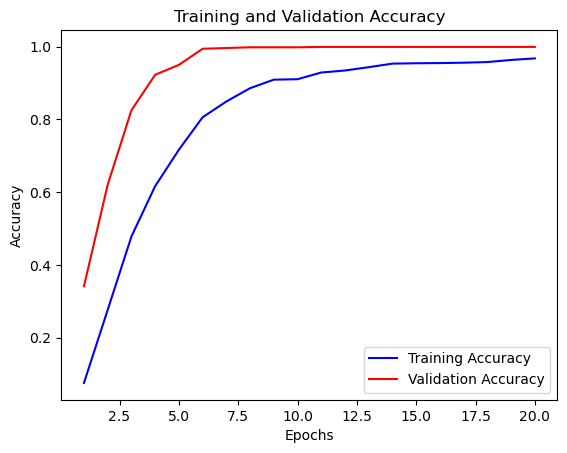

In [47]:
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### iii. Plot the loss
Plot the loss of the model in the epoch. The plot is the loss of both the train set and validation set data. After that, look at the graph. The graph should continue decrease at each epoch, then the model is well-fit.

In this case, the graph shows the both training and validation loss is decreasing. That mean the model is well-fit.

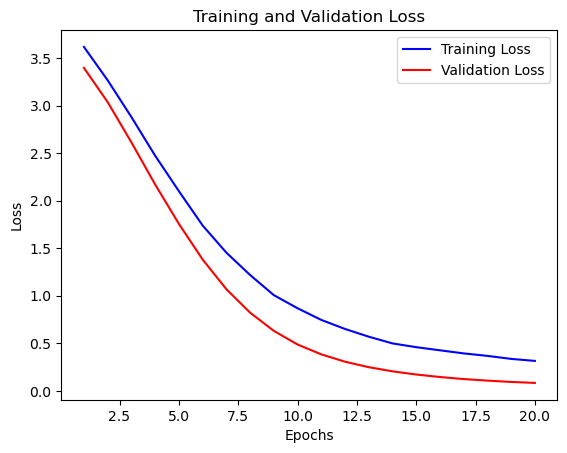

In [50]:
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### iv. Evaluate with Classification Report
In the classification report, there are generally several evaluation metrics presented for each class, including:
- Precision: Precision measures the extent to which the positive predictions made by the model are correct. In the context of classification, precision describes the percentage of correct predictions (True Positive) compared to the number of positive predictions (True Positive + False Positive). A high precision indicates that the model is less likely to classify negative samples as positive.

- Recall: Recall (sensitivity) measures the extent to which the model can correctly identify all positive samples present. In the context of classification, recall describes the percentage of correct predictions (True Positive) compared to the actual number of positive samples (True Positive + False Negative). A high recall indicates that the model has a good ability to accurately classify positive samples.

- F1-score: F1-score is a combination of precision and recall, which provides a balanced measure between the two metrics. F1-score is calculated as the harmonic mean of precision and recall. A high F1-score indicates a good balance between precision and recall, so the model is able to provide good classification overall.

- Support: Support indicates the number of samples present in each class. It provides information about the distribution of the data and how balanced the classes are.

In addition to the above metrics, classification reports can also include other metrics such as overall accuracy, as well as averages of these metrics, such as macro average and weighted average, which give an idea of the overall performance of the model.

In [55]:
# Get name label based index
label_names = label_encoder.classes_

# Predict with validation set
y_pred = model.predict(X_val)
y_pred = np.argmax(model.predict(X_val), axis=-1)

# Print classification report
report = classification_report(y_val_encoded, y_pred, target_names=label_names)
print(report)

32/32 [==============================] - 0s 2ms/step
                                precision    recall  f1-score   support

                          AIDS       1.00      1.00      1.00        20
                        Alergi       1.00      1.00      1.00        29
                      Artritis       1.00      1.00      1.00        24
                 Asma Bronkial       1.00      1.00      1.00        30
                     Cacar air       1.00      1.00      1.00        27
                Demam berdarah       1.00      1.00      1.00        28
                      Diabetes       1.00      1.00      1.00        30
                          GERD       1.00      1.00      1.00        25
               Gastroenteritis       1.00      1.00      1.00        18
   Hemoroid dimorfik (ambeien)       1.00      1.00      1.00        31
                   Hepatitis A       1.00      1.00      1.00        21
           Hepatitis Alkoholik       1.00      1.00      1.00        26
          

In this case, The model performed very well in classifying each class with a `precision`, `recall`, and `F1-score` of **1**. Can be concluded that the trained model has an excellent ability to classify various diseases with high accuracy. The model is able to learn relevant patterns from the training data and apply them well to the test data.

## F. Save Model
Save the best model into .hdf5 for re-training or just load to make some prediction with the model.

In [57]:
filepath = "Model h5/model.h5"
model.save(filepath)

## G. Conclusion
Based on evaluation model (from `model.evaluate` method, the graph, and the `classification report`) the model made very well-fit with accuracy **96.75%**, validation **99.90%**, and test **95.12%**. So we can used the model to predict well.